In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt 

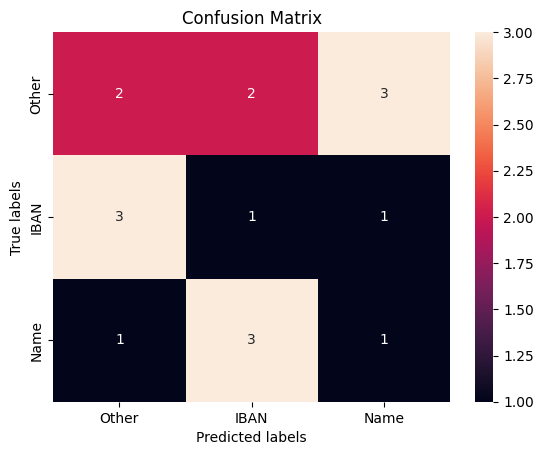

In [2]:
y_true = [
    "IBAN", "Name",  "Other",  "Other",  "IBAN", "Name",  "IBAN",  "Other", "Name",  "Other",  
    "IBAN", "Name",  "IBAN",  "Other",  "Other", "Name",  "Other"
]
y_prediction = [
    "Name", "Name",  "IBAN",  "Other",  "Other",  "Other",  "Other", "Name", "IBAN", "Name",  
    "IBAN",  "IBAN",  "Other",  "Other",  "IBAN",  "IBAN", "Name"
]
labels = ["Other", "IBAN", "Name"]
cnf_matrix = confusion_matrix(y_true, y_prediction, labels=labels)
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
_ = ax.yaxis.set_ticklabels(labels)

#### Consider IBAN entity

In [3]:
def print_metrics(tp, fn, fp, tn):
    print(f"True Pos: {tp}")
    print(f"False Neg: {fn}")
    print(f"False Pos: {fp}")
    print(f"True Neg: {tn}")

In [4]:
label = "IBAN"
idx = labels.index(label)
# Correctly predicted IBAN for IBAN instances
TP = cnf_matrix[idx, idx]
# Predicted non-IBAN for IBAN instances
FN = cnf_matrix[idx, np.arange(cnf_matrix.shape[-1]) != idx].sum()
# Predicted "IBAN" for Other and Name 
FP = cnf_matrix[np.arange(cnf_matrix.shape[-1]) != idx, idx].sum()
# Correctly predcited non-IBAN for non-IBAN instances
TN = cnf_matrix.sum() - (FP + FN + TP)
print_metrics(TP, FN, FP, TN)

True Pos: 1
False Neg: 4
False Pos: 5
True Neg: 7


In [5]:
# Correctly detected IBAN instances out of all IBAN instances
recall = TP / (TP + FN)
# False negative rate: percentage of non-detected IBAN instances among IBAN instances = 1 - recall = type II error
FNR = FN / (TP + FN)
# False positive rate: percentage of detected IBAN instances among non-IBAN instances = type I error
FPR = FP / (FP + TN)
print(f"Recall: {recall}\nFalse Neg Rate: {FNR:.1}\nFalse Pos Rate: {FPR:.2}")

Recall: 0.2
False Neg Rate: 0.8
False Pos Rate: 0.42
